In [13]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [14]:
from google.colab import files
uploaded=files.upload()

Saving socialmedia-disaster-tweets-DFE.csv to socialmedia-disaster-tweets-DFE.csv


In [20]:
encodings_to_try = ['utf-8', 'iso-8859-1', 'cp1252', 'utf-16']
for encoding in encodings_to_try:
    try:
        df = pd.read_csv('socialmedia-disaster-tweets-DFE.csv', encoding=encoding)
        print(f"File read successfully with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")


Failed to read with encoding: utf-8
File read successfully with encoding: iso-8859-1


In [21]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               10876 non-null  int64  
 1   _golden                10876 non-null  bool   
 2   _unit_state            10876 non-null  object 
 3   _trusted_judgments     10876 non-null  int64  
 4   _last_judgment_at      10792 non-null  object 
 5   choose_one             10876 non-null  object 
 6   choose_one:confidence  10876 non-null  float64
 7   choose_one_gold        87 non-null     object 
 8   keyword                10789 non-null  object 
 9   location               7238 non-null   object 
 10  text                   10876 non-null  object 
 11  tweetid                10876 non-null  float64
 12  userid                 10789 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [23]:
df.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           84
choose_one                   0
choose_one:confidence        0
choose_one_gold          10789
keyword                     87
location                  3638
text                         0
tweetid                      0
userid                      87
dtype: int64

In [24]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'choose_one', 'choose_one:confidence',
       'choose_one_gold', 'keyword', 'location', 'text', 'tweetid', 'userid'],
      dtype='object')

In [26]:
text_df=df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'choose_one', 'choose_one:confidence',
       'choose_one_gold', 'keyword', 'location', 'tweetid', 'userid'],
      axis=1)
text_df.head(10)

,text
0,Just happened a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...
2,"Heard about #earthquake is different cities, s..."
3,"there is a forest fire at spot pond, geese are..."
4,Forest fire near La Ronge Sask. Canada
5,All residents asked to 'shelter in place' are ...
6,"13,000 people receive #wildfires evacuation or..."
7,Just got sent this photo from Ruby #Alaska as ...
8,#RockyFire Update => California Hwy. 20 closed...
9,Apocalypse lighting. #Spokane #wildfires


In [27]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Just happened a terrible car crash 

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 

Heard about #earthquake is different cities, stay safe everyone. 

there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all 

Forest fire near La Ronge Sask. Canada 



In [28]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10876 non-null  object
dtypes: object(1)
memory usage: 85.1+ KB


In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [38]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [40]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
text_df.text = text_df['text'].apply(data_processing)

In [42]:
text_df = text_df.drop_duplicates('text')

In [43]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [44]:
text_df.head()

,text
0,happened terrible car crash
1,deeds reason earthquake may allah forgive us
2,heard earthquake different cities stay safe ev...
3,forest fire spot pond geese fleeing across str...
4,forest fire near la ronge sask canada


In [45]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

happened terrible car crash 

deeds reason earthquake may allah forgive us 

heard earthquake different cities stay safe everyone 

forest fire spot pond geese fleeing across street save 

forest fire near la ronge sask canada 



In [46]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10628 entries, 0 to 10875
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10628 non-null  object
dtypes: object(1)
memory usage: 166.1+ KB


In [47]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [49]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [50]:
text_df.head(10)

,text,polarity
0,happened terrible car crash,-1.0000
1,deeds reason earthquake may allah forgive us,0.0000
2,heard earthquake different cities stay safe ev...,0.2500
3,forest fire spot pond geese fleeing across str...,0.0000
4,forest fire near la ronge sask canada,0.1000
5,residents asked shelter place notified officer...,-0.1000
6,13000 people receive wildfires evacuation orde...,0.0000
7,got sent photo ruby alaska smoke wildfires pou...,0.0000
8,rockyfire update california hwy 20 closed dire...,-0.1125
9,apocalypse lighting spokane wildfires,0.0000


In [51]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [52]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [53]:
text_df.head()

,text,polarity,sentiment
0,happened terrible car crash,-1.00,Negative
1,deeds reason earthquake may allah forgive us,0.00,Neutral
2,heard earthquake different cities stay safe ev...,0.25,Positive
3,forest fire spot pond geese fleeing across str...,0.00,Neutral
4,forest fire near la ronge sask canada,0.10,Positive


<Axes: xlabel='sentiment', ylabel='count'>

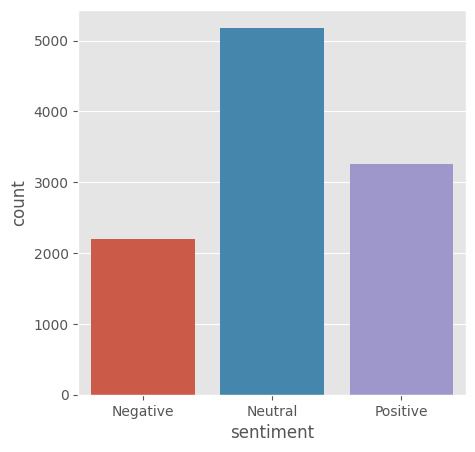

In [54]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

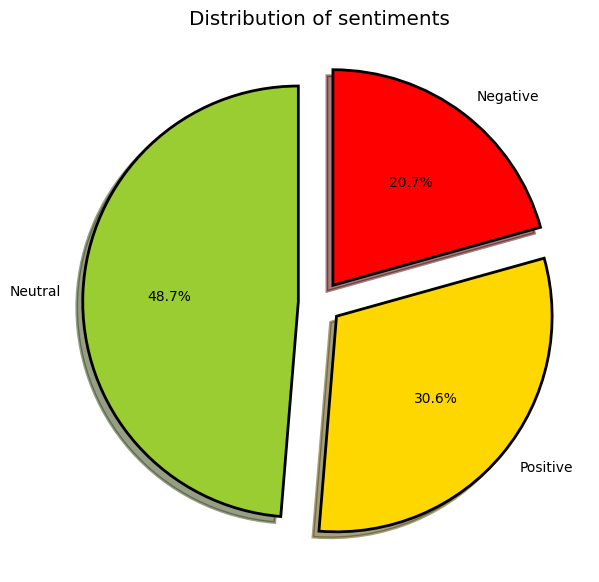

In [55]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [56]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
5275,fleshgod apocalypse blinded fear mini drum cov...,1.0,Positive
2935,remainontop fettilootch slanglucci oppressions...,1.0,Positive
7089,read awesome book yet two trillion dollar melt...,1.0,Positive
5093,would rather dwell land famine gods perfect re...,1.0,Positive
9719,homeworldgym thisisperidot thats tragedy wonde...,1.0,Positive


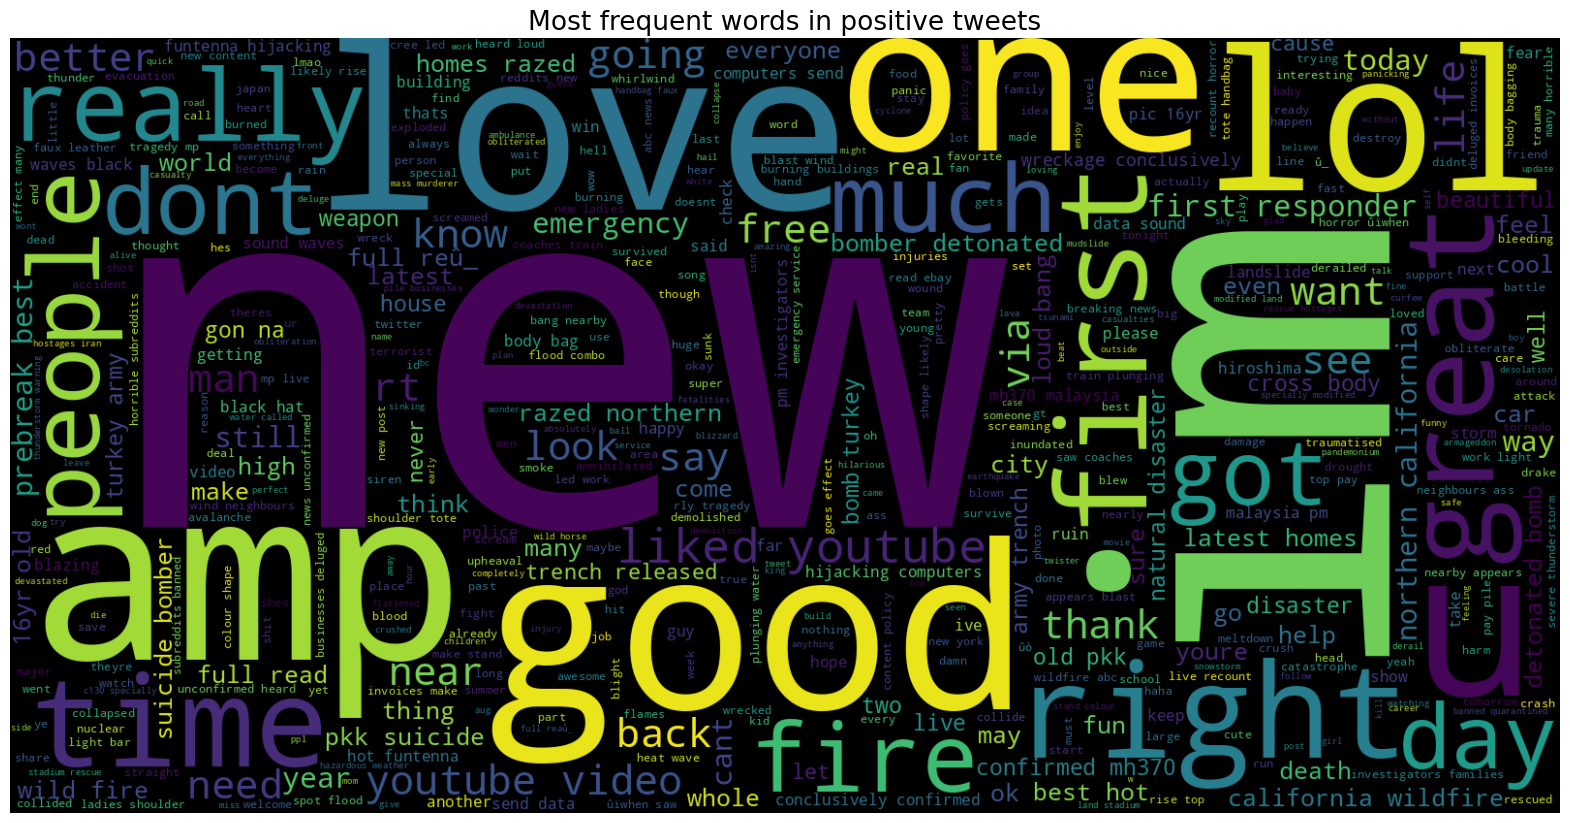

In [57]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [58]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
1495,womens buckle casual stylish shoulder handbags...,-2.775558e-17,Negative
1336,sassynreal agreed whole thing blown faces righ...,-2.857143e-03,Negative
5571,2 nnw hana maui co hi county official reports ...,-3.571429e-03,Negative
9310,mean relationship cant survive thezlong term e...,-4.166667e-03,Negative
5751,first year forest service spent half annual bu...,-5.555556e-03,Negative


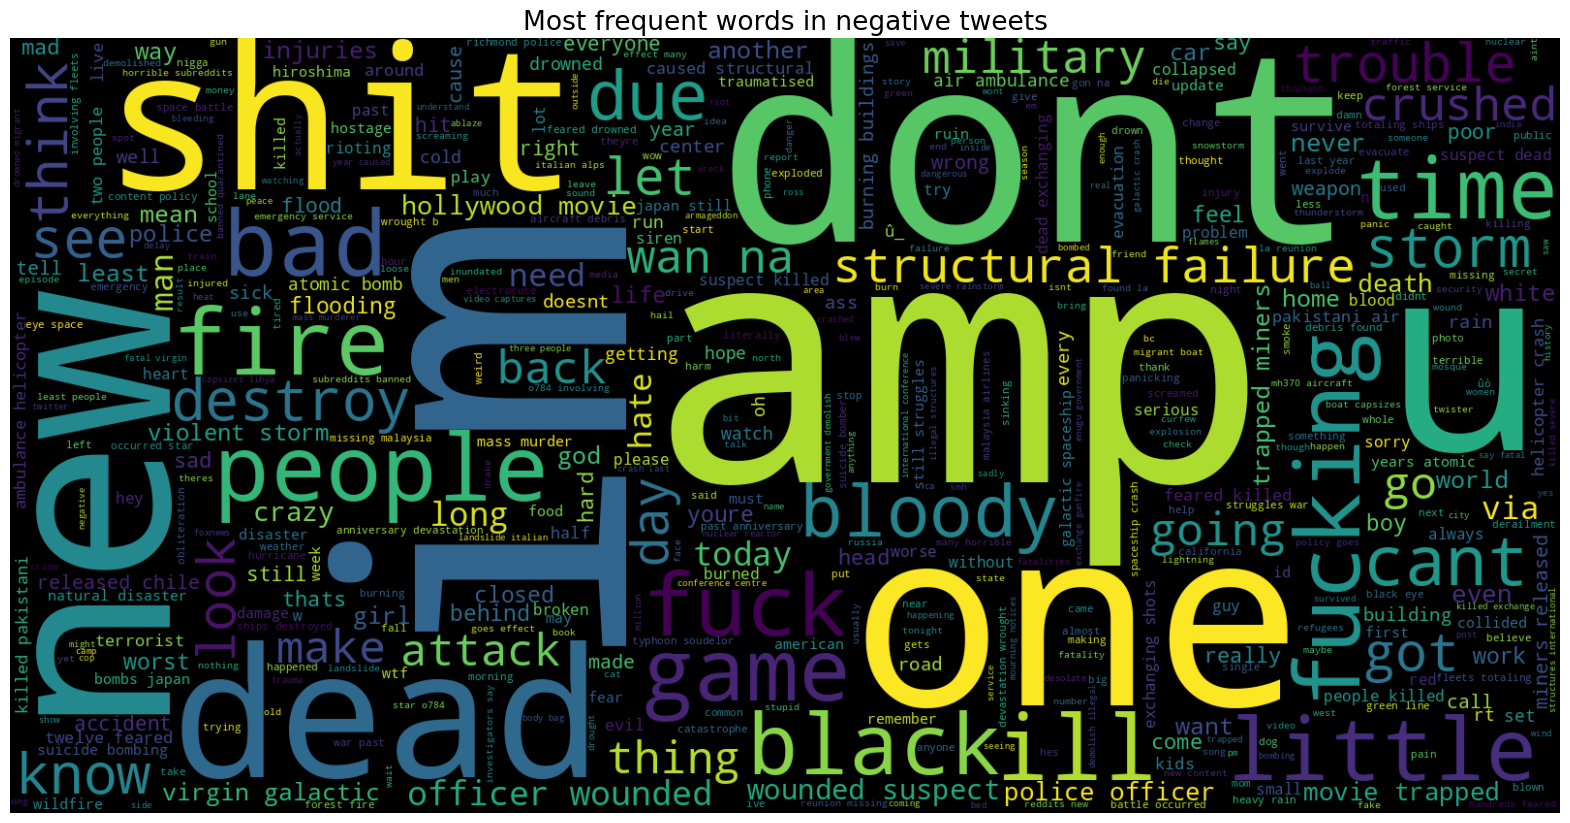

In [59]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [60]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
1,deeds reason earthquake may allah forgive us,0.0,Neutral
7325,finnish ministers fennovoima nuclear reactor g...,0.0,Neutral
7287,573 deaths certified government ûnuclear disas...,0.0,Neutral
7285,fukushima story nuclear disaster httptcoikpngs...,0.0,Neutral
7282,safety nuclear regulatory committee japan alre...,0.0,Neutral


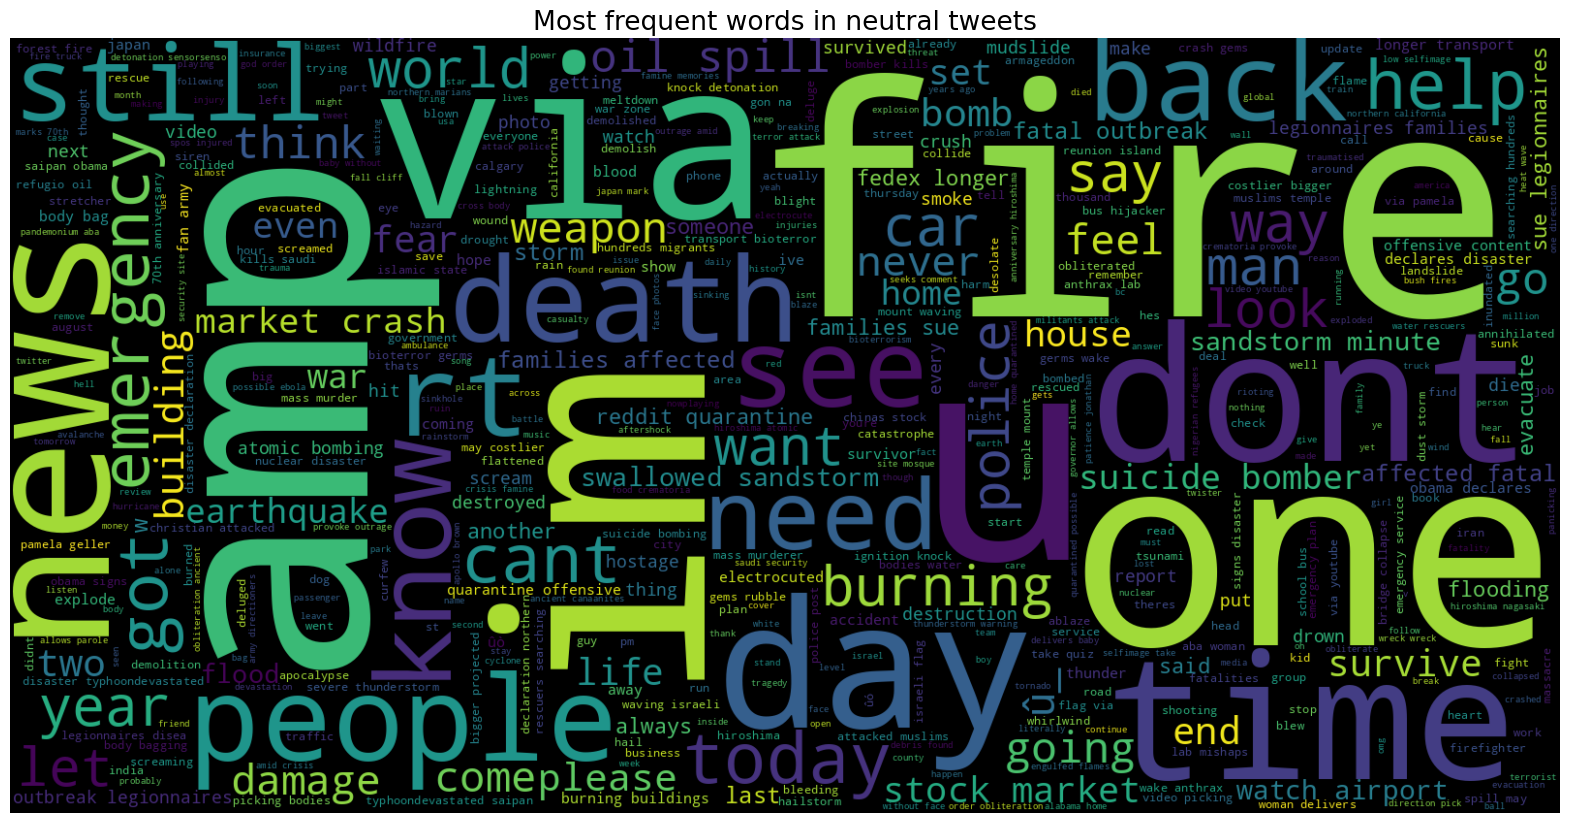

In [61]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [64]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8502, 100947)
Size of y_train: (8502,)
Size of x_test: (2126, 100947)
Size of y_test: (2126,)


In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.87%


In [69]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 268  135   30]
 [   8 1017    8]
 [  19  143  498]]


              precision    recall  f1-score   support

    Negative       0.91      0.62      0.74       433
     Neutral       0.79      0.98      0.87      1033
    Positive       0.93      0.75      0.83       660

    accuracy                           0.84      2126
   macro avg       0.87      0.79      0.81      2126
weighted avg       0.86      0.84      0.83      2126



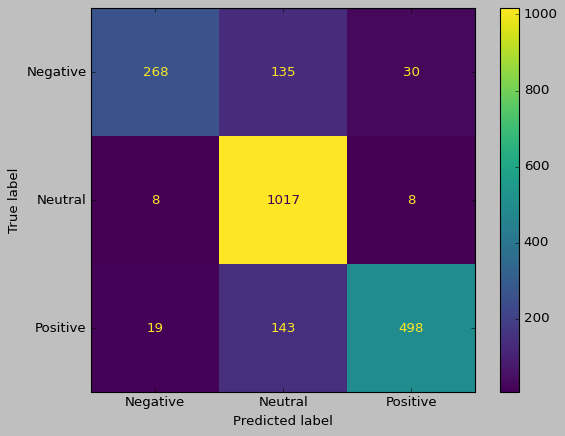

In [70]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [73]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [74]:
y_pred = grid.predict(x_test)

In [75]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.28%


In [76]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 279  125   29]
 [   8 1017    8]
 [  21  122  517]]


              precision    recall  f1-score   support

    Negative       0.91      0.64      0.75       433
     Neutral       0.80      0.98      0.89      1033
    Positive       0.93      0.78      0.85       660

    accuracy                           0.85      2126
   macro avg       0.88      0.80      0.83      2126
weighted avg       0.87      0.85      0.85      2126



In [77]:
from sklearn.svm import LinearSVC

In [78]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
LinearSVC()

LinearSVC()

In [79]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 86.50%


In [80]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 295  111   27]
 [   9 1017    7]
 [  23  110  527]]


              precision    recall  f1-score   support

    Negative       0.90      0.68      0.78       433
     Neutral       0.82      0.98      0.90      1033
    Positive       0.94      0.80      0.86       660

    accuracy                           0.87      2126
   macro avg       0.89      0.82      0.85      2126
weighted avg       0.87      0.87      0.86      2126



In [81]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [82]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [83]:
y_pred = grid.predict(x_test)

In [84]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.50%


In [85]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 295  111   27]
 [   9 1017    7]
 [  23  110  527]]


              precision    recall  f1-score   support

    Negative       0.90      0.68      0.78       433
     Neutral       0.82      0.98      0.90      1033
    Positive       0.94      0.80      0.86       660

    accuracy                           0.87      2126
   macro avg       0.89      0.82      0.85      2126
weighted avg       0.87      0.87      0.86      2126

